# Multi-layer networks

In [1]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
from torchinfo import summary

from utils import *
train_loader, test_loader, train_set, test_set = load_mnist(64)

# Multi-layer perceptron
In a multi-layer network, we will add one or more hidden layers to our network.
![](https://docs.microsoft.com/en-us/learn/modules/intro-computer-vision-pytorch/images/dense-multilayer-network.png)
This layer may contain any number of neurons, which will affect how powerful our neural network it, i.e. how many parameters will it have. The more parameters there are in the network - the more data we need to train it.

However, more is not always better. A number of parameters of a neural network should be chosen depending on the dataset size, to prevent overfitting.

Our network structure will look like this:
![](https://docs.microsoft.com/en-us/learn/modules/intro-computer-vision-pytorch/images/multilayer-network-layers.png)


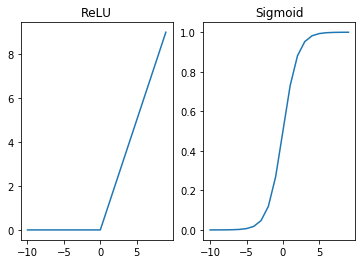

In [2]:
def plot_function(f, name=''):
    plt.plot(range(-10,10), [f(torch.tensor(x,dtype=torch.float32)).item() for x in range(-10,10)])
    plt.title(name)

plt.subplot(121)
plot_function(torch.relu, 'ReLU')
plt.subplot(122)
plot_function(torch.sigmoid, 'Sigmoid')

Our network can be defined in pytorch in the following way, using the `nn.Sequential`.

In [3]:
net = nn.Sequential(
        nn.Flatten(), 
        nn.Linear(784,100),     # 784 inputs, 100 outputs
        nn.ReLU(),              # Activation Function
        nn.Linear(100,10),      # 100 inputs, 10 outputs
        nn.LogSoftmax(dim=0))

summary(net,input_size=(1,28,28))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               --                        --
├─Flatten: 1-1                           [1, 784]                  --
├─Linear: 1-2                            [1, 100]                  78,500
├─ReLU: 1-3                              [1, 100]                  --
├─Linear: 1-4                            [1, 10]                   1,010
├─LogSoftmax: 1-5                        [1, 10]                   --
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
Total mult-adds (M): 0.08
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.32
Estimated Total Size (MB): 0.32

Epoch  0, Train acc=0.927, Val acc=0.954, Train loss=0.035, Val loss=0.033
Epoch  1, Train acc=0.955, Val acc=0.957, Train loss=0.033, Val loss=0.033
Epoch  2, Train acc=0.959, Val acc=0.956, Train loss=0.033, Val loss=0.033
Epoch  3, Train acc=0.961, Val acc=0.963, Train loss=0.033, Val loss=0.033
Epoch  4, Train acc=0.963, Val acc=0.958, Train loss=0.033, Val loss=0.033


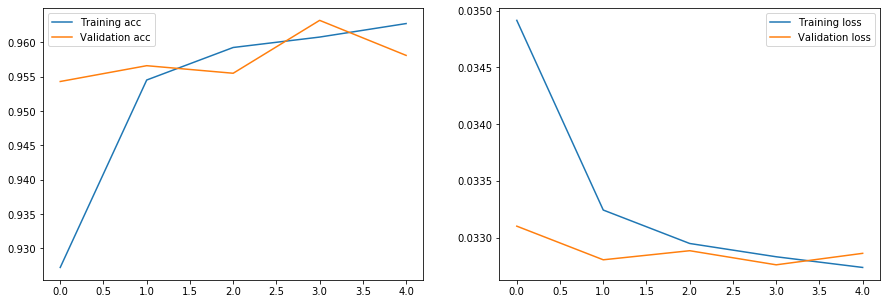

In [4]:
hist = train(net,train_loader,test_loader, epochs=5)
plot_results(hist)

# Class-based network definitions
Defining models using a Sequential style as a list of layers seems very convenient but it is somewhat limited. At some point we may need to define more complex networks, which contain shared weights, or some non-linear connections between layers.

In [5]:
from torch.nn.functional import relu, log_softmax

class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.flatten = nn.Flatten()
        self.hidden = nn.Linear(784,100)
        self.output = nn.Linear(100,10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.hidden(x)
        x = relu(x)
        x = self.output(x)
        x = log_softmax(x, dim=0)
        return x

net = MyNet()
summary(net, input_size=(1,28,28))

Layer (type:depth-idx)                   Output Shape              Param #
MyNet                                    --                        --
├─Flatten: 1-1                           [1, 784]                  --
├─Linear: 1-2                            [1, 100]                  78,500
├─Linear: 1-3                            [1, 10]                   1,010
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
Total mult-adds (M): 0.08
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.32
Estimated Total Size (MB): 0.32

Class definition consists of two parts:

In the constructor `(__init__)` we define all layers that our network will have. Those layers are stored as internal variables of the class, and PyTorch will automatically know that parameters of those layers should be optimized when training. Internally, PyTorch uses parameters() method to look for all trainable parameters, and nn.Module will automatically collect all trainable parameters from all sub-modules.
We define the forward method that does the forward pass computation of our neural network. In our case, we start with a parameter tensor x, and explicitly pass it through all the layers and activation functions, starting from flatten, up to final linear layer out. When we apply our neural network to some input data x by writing out = net(x), the forward method is called.
In fact, Sequential networks are represented in a very similar manner, they just store a list of layers and apply them sequentially during the forward pass. Here we have a chance to represent this process more explicitly, which eventually gives us more flexibility. That is one of the reasons that using classes for neural network definition is a recommended and perfered practice.

Epoch  0, Train acc=0.930, Val acc=0.955, Train loss=0.035, Val loss=0.033
Epoch  1, Train acc=0.955, Val acc=0.956, Train loss=0.033, Val loss=0.033
Epoch  2, Train acc=0.958, Val acc=0.954, Train loss=0.033, Val loss=0.033
Epoch  3, Train acc=0.961, Val acc=0.960, Train loss=0.033, Val loss=0.033
Epoch  4, Train acc=0.963, Val acc=0.952, Train loss=0.033, Val loss=0.033


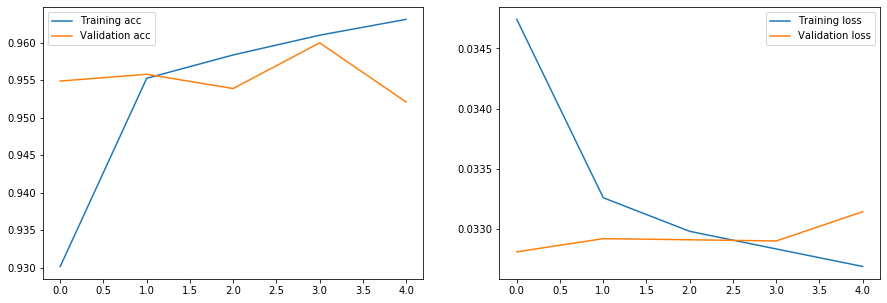

In [6]:
hist = train(net,train_loader,test_loader,epochs=5)
plot_results(hist)

Multi-level networks can achieve higher accuracy than single-layer perceptron, however, they are not perfect for computer vision tasks. In images, there are some structural patterns that can help us classify an object regardless of it's position in the image, but perceptrons do not allow us to extract those patterns and look for them selectively.